In [ ]:
import csv
import pandas as pd
import os
import shutil
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def remove_NA(data_path):
    holder = list()
    data =  pd.read_csv(data_path)
    data.columns[0:4].tolist()
    if list(data.columns) in ['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTR']:
        data = data.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTR'],1).reset_index()
    for i in data.columns.tolist():
        data[i].replace('', np.nan, inplace=True)
        data.dropna(subset=[i], inplace=True)
    holder.append(data)
    print(data_path + " is cleaned")
        
    return holder[0]

def remove_cols(df):
    labels = [
        ("FTHG", "FTAG"),
        ("HTHG", "HTAG"),
        ("HS", "AS"),
        ("HST", "AST"),
        ("HF", "AF"),
        ("HC", "AC"),
        ("HY", "AY"),
        ("HR", "AR"),
    ]
    columns = ["Date", "HomeTeam", "AwayTeam", "AwayWinRate", "HomeWinRate", "FTR", "isWin"]
    h = [x[0] for x in labels]
    a = [x[1] for x in labels]
    kept_csv = h + a + columns
    df.drop(df.columns.difference(kept_csv), 1, inplace=True)
    return df




def do_elbow(X_test):
    #--------------- Elbow to find see the best number of cluster
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X_test)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


def do_kmean(X_test, original_df, n_cluster = 3, do_pca = False):
    if not do_pca:
        #--------------- Selecting the best n as our n_cluster
        kmeans = KMeans(n_cluster, init='k-means++',
                        max_iter=300, n_init=300, random_state=0)
        pred_y = kmeans.fit_predict(X_test)

        #--------------- Viz our clusters
        plt.scatter(X_test[:,0], X_test[:,1])
        plt.scatter(kmeans.cluster_centers_[:, 0],
                    kmeans.cluster_centers_[:, 1], s=300, c='red')
        plt.show()


        data_holder = [df[pred_y == j] for j in set(pred_y)]
        data = [data_holder[0]["HST"],data_holder[1]["HST"],data_holder[2]["HST"]]


        fig = plt.figure(figsize =(10, 7))
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])

        # Creating plot
        bp = ax.boxplot(data)

        # show plot
        plt.show()

        #_________________________ VS ___________________________
        data = [data_holder[0]["FTHG"],data_holder[1]["FTHG"],data_holder[2]["FTHG"]]


        fig = plt.figure(figsize =(10, 7))
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])

        # Creating plot
        bp = ax.boxplot(data)

        # show plot
        plt.show()
    else: 
        X_test = df.to_numpy()
        X_test = StandardScaler().fit_transform(X_test)
        pca = PCA(n_components=2)
        X_test = pca.fit_transform(X_test)

        #--------------- Selecting the best n as our n_cluster
        kmeans = KMeans(n_cluster, init='k-means++', max_iter=300, n_init=300, random_state=0)
        pred_y = kmeans.fit_predict(X_test)

        #--------------- Viz our clusters
        plt.scatter(X_test[:,0], X_test[:,1])
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
        plt.show()


        data_holder = [df[pred_y == j] for j in set(pred_y)]
        data = [data_holder[0]["HST"],data_holder[1]["HST"],data_holder[2]["HST"]]


        fig = plt.figure(figsize =(10, 7))
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])

        # Creating plot
        bp = ax.boxplot(data)

        # show plot
        plt.show()

        #_________________________ VS ___________________________
        data = [data_holder[0]["FTHG"],data_holder[1]["FTHG"],data_holder[2]["FTHG"]]


        fig = plt.figure(figsize =(10, 7))
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])

        # Creating plot
        bp = ax.boxplot(data)

        # show plot
        plt.show()



        labels2 = kmeans.labels_
        centroids2=kmeans.cluster_centers_
        UD = original_df[[i for i in original_df.columns if i not in ["isWin", "label"]]]
        legend = [list(UD.columns), list(UD.columns)]
        t_l = list()
        for i in legend[0]:
            for j in legend[1]:
                t_l.append((i, j))

        h = 0.003
        x_min, x_max = X_test[:, 0].min() - 1, X_test[: , 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[: , 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        z2 = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        plt.figure(1, figsize = (15, 7))
        plt.clf()
        z2 = z2.reshape(xx.shape)
        plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
        plt.scatter(X_test[:,0], X_test[:,1], c = labels2, s = 100)
        plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 200, c = 'red', alpha = 0.5)
        plt.ylabel, plt.xlabel
        plt.show()

        
def preprocessing(path):
    
    df = pd.read_csv(path)
    keys = list(set(df["HomeTeam"]))
    dict_holder = {k:v for k,v in zip(keys,range(0,len(keys)))}

    for indx in list(set(df["HomeTeam"])):
            dict_holder[indx] = (df.loc[df["HomeTeam"] == indx,:]).mean()

    pd.DataFrame.from_dict(dict_holder).T.to_csv('test_set_18To19_DICT.csv')
    this_path = 'test_set_18To19_DICT.csv'
    df = pd.read_csv(this_path)
    df = remove_cols(df)
    df.to_csv('test_set_18To19_removeCol.csv')
    df = remove_NA('test_set_18To19_removeCol.csv')
    return df

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_9088/3506602586.py:180: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dict_holder[indx] = (df.loc[df["HomeTeam"] == indx,:]).mean()
C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_9088/3506602586.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(kept_csv), 1, inplace=True)
C:\Users\Kiavosh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


test_set_18To19_removeCol.csv is cleaned


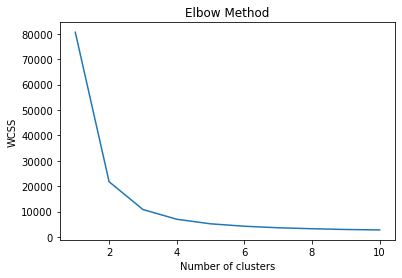

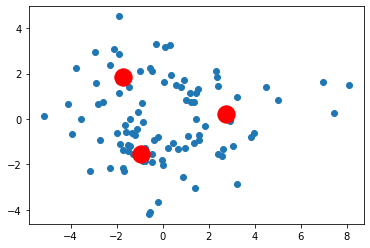

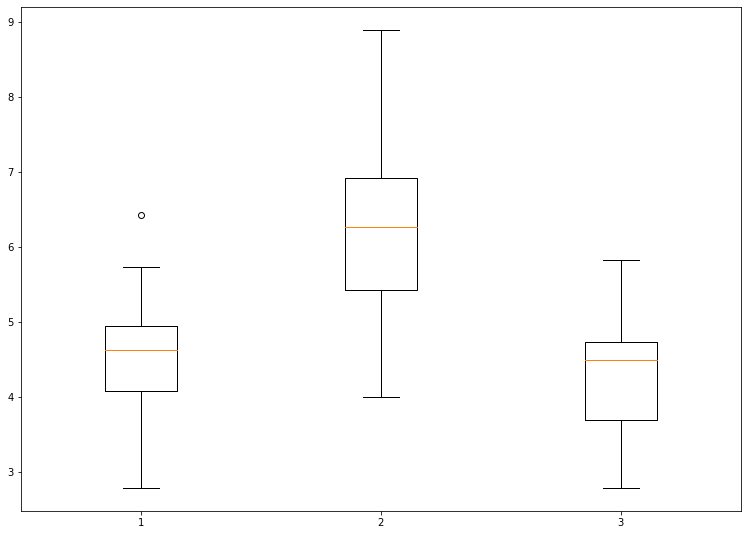

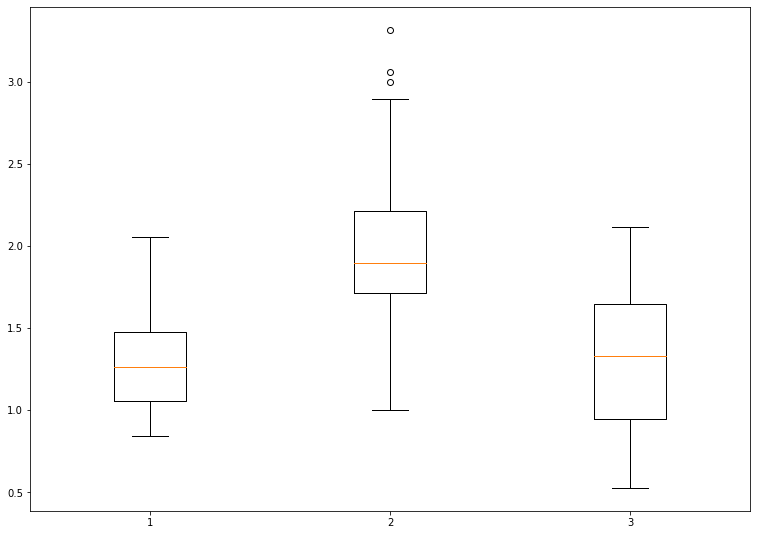

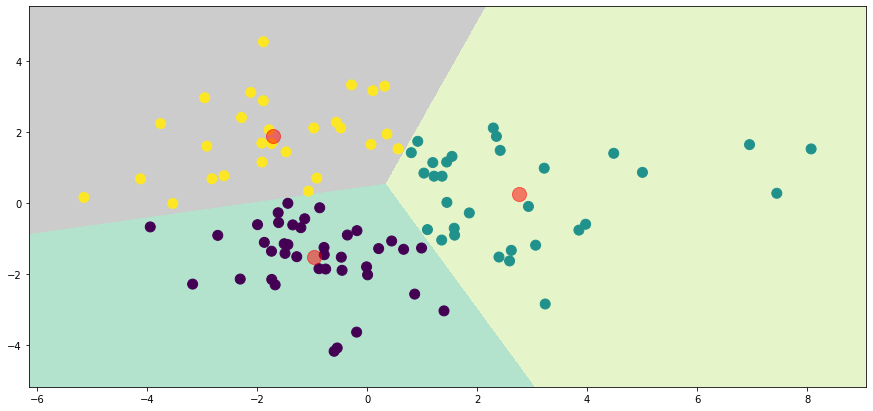

In [ ]:
path = "test_set_18To19.csv"
df = preprocessing(path)
X_test = df.to_numpy()
do_elbow(X_test)
do_kmean(X_test, df, 3, True)
do_kmean(X_test, df, 3, True)